In [127]:
import sys
sys.path.append('../scripts')
from helpers import *
from eda import *
import matplotlib.pyplot as plt
import re

In [105]:
path = '../data/raw_data/twitter_training.csv'
df = read_file(path)
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [106]:
df.shape

(74682, 4)

In [107]:
df.dtypes

Tweet ID          int64
entity           object
sentiment        object
Tweet content    object
dtype: object

In [108]:
df.isnull().sum()

Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64

In [110]:
# missing_percentage
(df.isnull().sum()/(len(df)))*100

Tweet ID         0.000000
entity           0.000000
sentiment        0.000000
Tweet content    0.918561
dtype: float64

In [111]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [112]:
df["sentiment"].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

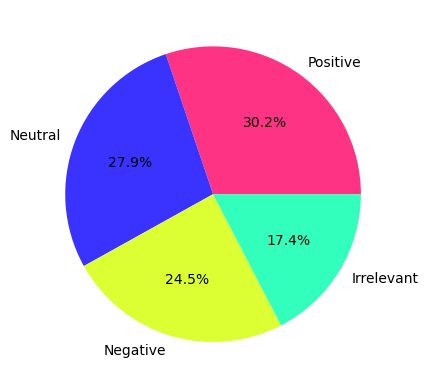

In [113]:
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].unique().tolist(), autopct='%1.1f%%',colors= ['#FF3384', '#3A33FF', '#DBFF33', '#33FFBD'])
plt.show()

<Axes: xlabel='sentiment'>

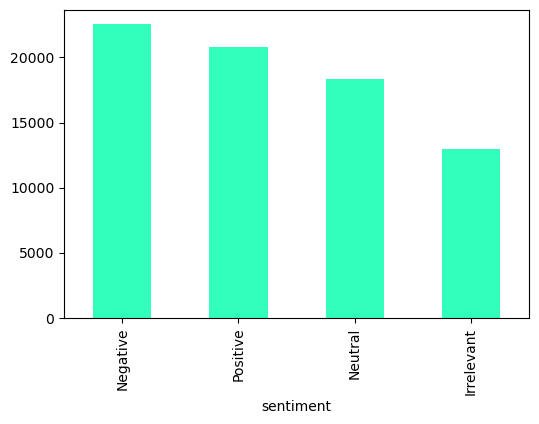

In [114]:
df['sentiment'].value_counts().plot.bar(color = '#33FFBD', figsize = (6, 4))

<Axes: ylabel='Frequency'>

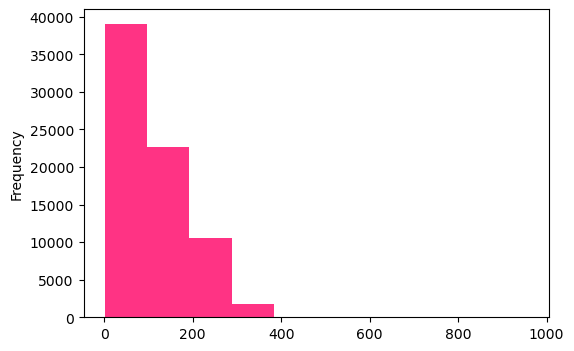

In [115]:
# checking the distribution of tweets in the data
df['Tweet content'].str.len().plot.hist(color = '#FF3384', figsize = (6, 4))

In [118]:
df["lower"]=df['Tweet content'].str.lower()
df["lower"]=[str(data) for data in df.lower]
df["lower"]=df.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

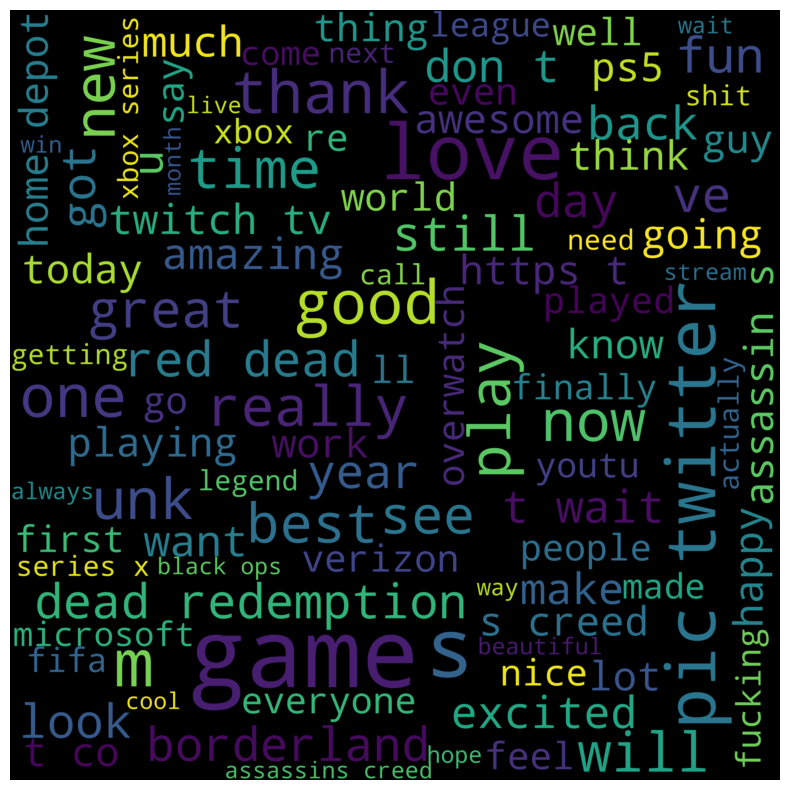

In [121]:
generate_word_cloud(df, "Positive")

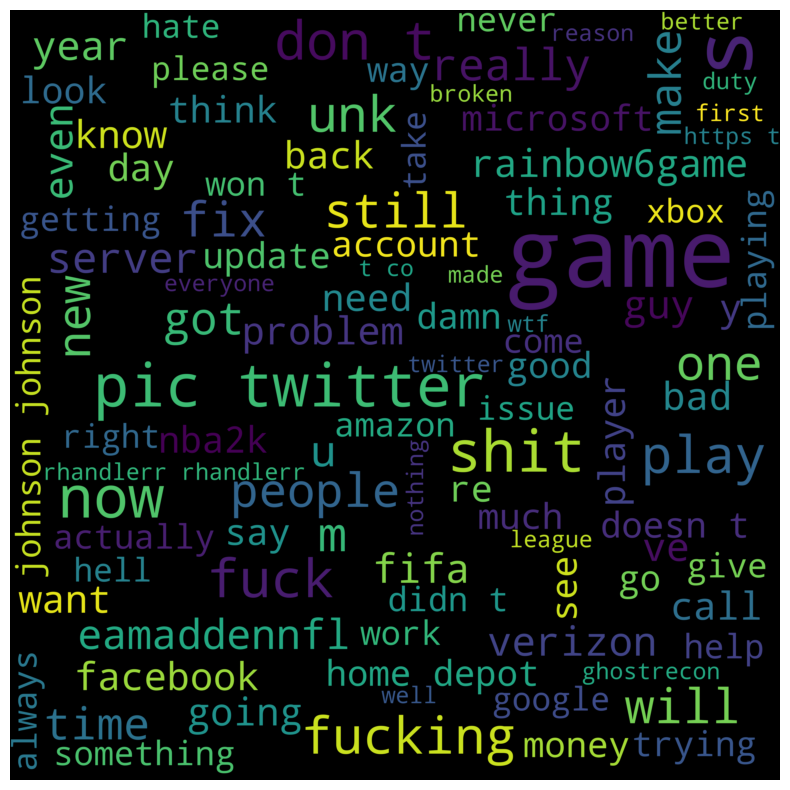

In [122]:
generate_word_cloud(df, "Negative")

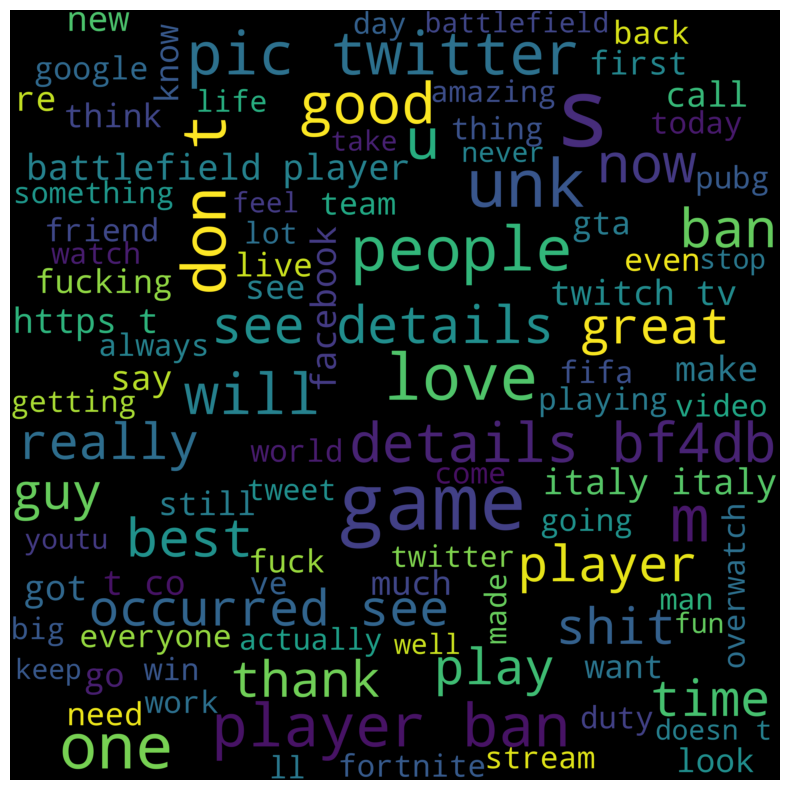

In [123]:
generate_word_cloud(df, "Irrelevant")

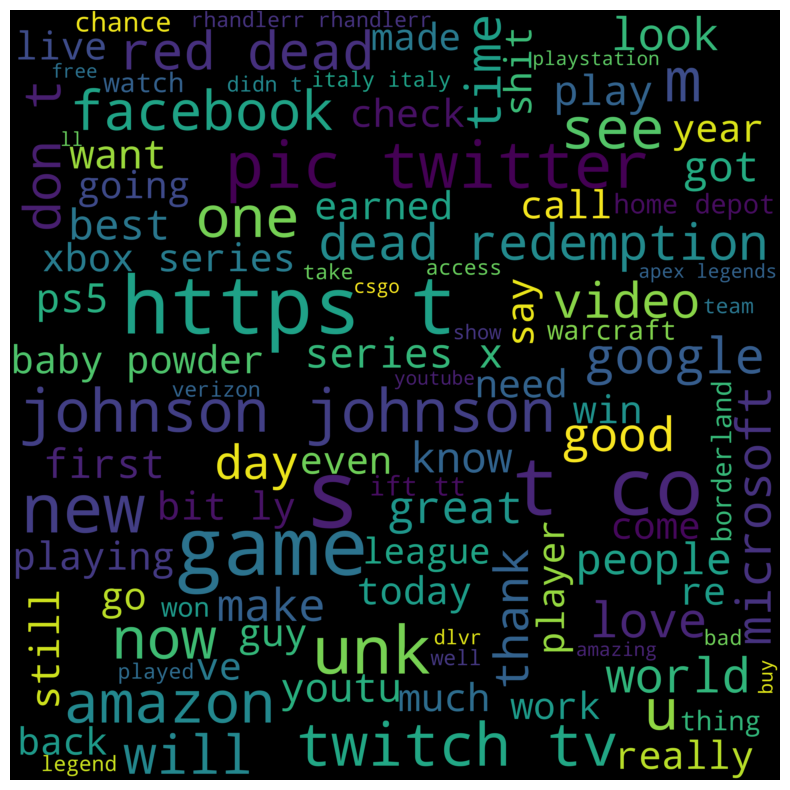

In [124]:
generate_word_cloud(df, "Neutral")